In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import subprocess
import bz2
%matplotlib inline

merged = pd.read_csv("./data/Merged/merged.txt" )

def rate(df, TU=0.2):
    
    
    
    df = df['orbit']
    
    timePerOrbit = 110*24.95
    print('timePerOrbit %2.1f ns '%timePerOrbit)

    timeUnit = TU*1e9 # desired time unit in seconds
    orbitsPerTimeUnit = timeUnit/timePerOrbit
    print('orbitsPerTimeUnit = %2.3f'%orbitsPerTimeUnit)

    orbitMin  = df[:1].values[0]
    orbitMax  = df[-1:].values[0] 
    rectime   = (orbitMax-orbitMin)*timePerOrbit # in ns
    print('orbitMin %d orbitMax %d'%(orbitMin, orbitMax))
    print('nOrbits %d '%(orbitMax - orbitMin))
    print('total recording time %2.4f ns (~= %2.1f s)' %(rectime, rectime*1.e-9))

    bins=int((orbitMax-orbitMin)/orbitsPerTimeUnit) 
    print("bins = %d" %bins)
    timePerBin = rectime/bins
    
    muons=np.zeros(bins)
    sclice=np.array([orbitMin+ ((orbitMax-orbitMin)/bins)*i for i in range(bins+1)])

    # Count the events in the first orbit = orbitMin
    for orbit in df:
        if(orbit > orbitMin): break
        if(orbit == orbitMin): muons[0] += 1

    df = df[int(muons[0]):] # We already counted the first orbit
    i = 0
    for orbit in df:
        while not (orbit > sclice[i] and orbit <= sclice[i + 1]) and i < bins-1: # Note the <= in 'orbit <= slicePlusOne[i]'. 
            i = i + 1                                                              # It is needed to capture the last orbit.
        muons[i] += 1
        
    # Maximum Likelihood Estimation of Poisson parameter
    Nmuons = int(muons.sum()) 
    Ninterval = len(muons) # How many time intervals

    mu = muons.mean()
    med = np.median(muons)
    sigma = muons.std()
    MLE = Nmuons/Ninterval
    print("Maximum Likelihood Estimate for Poisson parameter λ: \nMLE = {}" .format(MLE))
    
    # 99% Confidence interval under gaussian approximation

    error = 2.58 * np.sqrt(MLE/Ninterval)
    lower = MLE-error
    upper = MLE+error

    #print("99% CI = [{},{} ]" .format(lower, upper))
    
    
    plt.figure(figsize=(8,8))

    muons = pd.Series(muons)
    counts = muons.value_counts().sort_index()

    plt.errorbar(counts.index, counts, xerr = None, yerr = np.sqrt(counts), fmt = 'o')
    plt.xlabel('nMuons / %2.1f s'%(timePerBin*1.e-9), fontsize = 20) # latex can be entered in the label's string
    plt.ylabel('Frequency', fontsize = 20)
    
    print('--------------------------------')
    print('mean = {:.2f}' .format(mu))
    print('median = {:d}'.format(int(med)))
    print('sample std = {:.2f}'.format( sigma))
    #print('Gaussian 99% Confidence Interval = [{:.2f} , {:.2f} ]'.format(lower, upper))
    plt.show()
    
    return (muons, TU)





# Unfiltered Rate

timePerOrbit 2744.5 ns 
orbitsPerTimeUnit = 72873.019
orbitMin 1 orbitMax 4260275698
nOrbits 4260275697 
total recording time 11692326650416.5000 ns (~= 11692.3 s)
bins = 58461
Maximum Likelihood Estimate for Poisson parameter λ: 
MLE = 39.79596654179709
--------------------------------
mean = 39.80
median = 39
sample std = 8.31


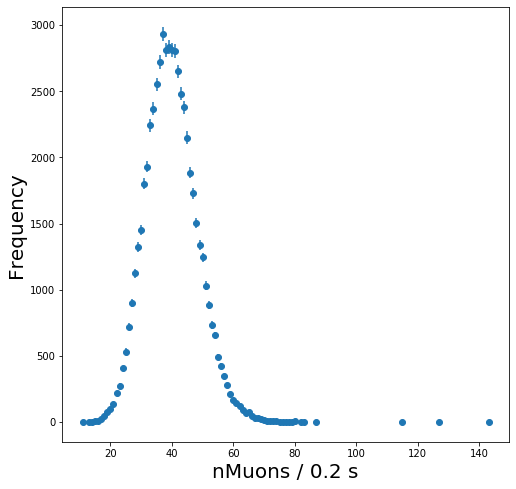

In [2]:
muons, TU = rate(merged, TU = 0.2)

In [3]:
# np.savetxt('muons_{}.txt'.format(TU), muons, fmt =' %d ') # so that someone else can intstant access to the data without running this code

# Unfiltered Charged Rates

POSITIVE CHARGE
timePerOrbit 2744.5 ns 
orbitsPerTimeUnit = 72873.019
orbitMin 1 orbitMax 4260275698
nOrbits 4260275697 
total recording time 11692326650416.5000 ns (~= 11692.3 s)
bins = 58461
Maximum Likelihood Estimate for Poisson parameter λ: 
MLE = 20.37642188809634
--------------------------------
mean = 20.38
median = 20
sample std = 5.13


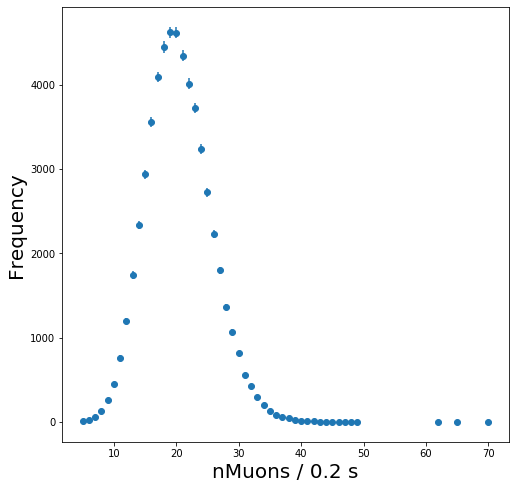






NEGATIVE CHARGE
timePerOrbit 2744.5 ns 
orbitsPerTimeUnit = 72873.019
orbitMin 5303 orbitMax 4260269363
nOrbits 4260264060 
total recording time 11692294712670.0000 ns (~= 11692.3 s)
bins = 58461
Maximum Likelihood Estimate for Poisson parameter λ: 
MLE = 19.419544653700758
--------------------------------
mean = 19.42
median = 19
sample std = 4.98


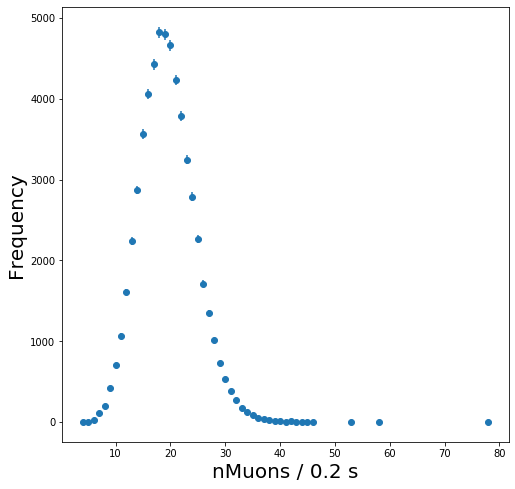

In [4]:
chPlus = merged[merged['charge'] == 1]
chMinus = merged[merged['charge'] == -1]

print('POSITIVE CHARGE')

muons_plus, tup = rate(chPlus)
print(4*'\n')
print('NEGATIVE CHARGE')

muons_minus, tum = rate(chMinus)


# Two Leg Muon Rate

timePerOrbit 2744.5 ns 
orbitsPerTimeUnit = 364365.094
orbitMin 41208 orbitMax 4260269363
nOrbits 4260228155 
total recording time 11692196171397.5000 ns (~= 11692.2 s)
bins = 11692
Maximum Likelihood Estimate for Poisson parameter λ: 
MLE = 16.06081081081081
--------------------------------
mean = 16.06
median = 16
sample std = 4.06


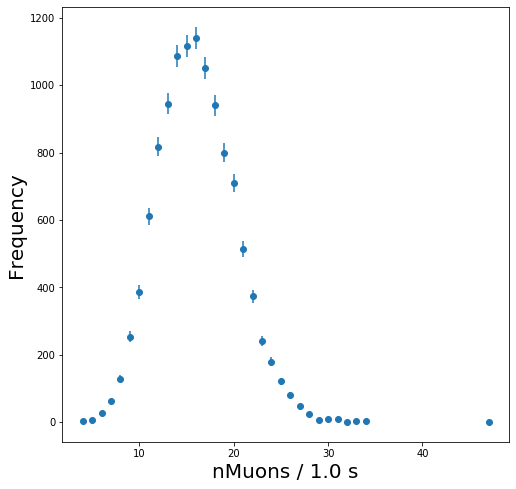

In [8]:
twoleg1 = pd.read_csv("./data/Merged/twolegOS1.txt" )

twoleg_muons, tu_tl = rate(twoleg1, TU = 1)

timePerOrbit 2744.5 ns 
orbitsPerTimeUnit = 364365.094
orbitMin 41208 orbitMax 4260229618
nOrbits 4260188410 
total recording time 11692087091245.0000 ns (~= 11692.1 s)
bins = 11692
Maximum Likelihood Estimate for Poisson parameter λ: 
MLE = 4.859818679438932
--------------------------------
mean = 4.86
median = 5
sample std = 2.24


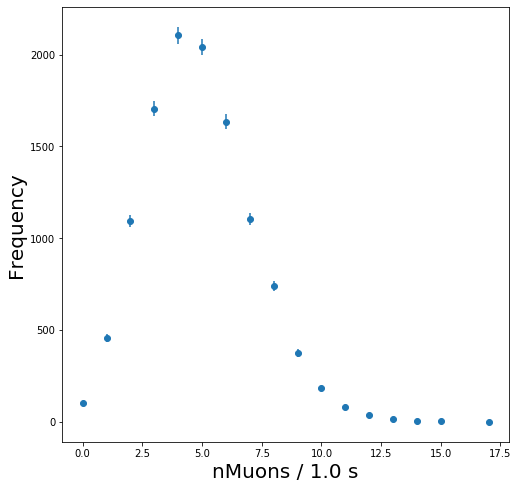

In [9]:
twoleg2 = pd.read_csv("./data/Merged/twolegOS2.txt" )

twoleg_muons, tu_tl = rate(twoleg2, TU = 1)

timePerOrbit 2744.5 ns 
orbitsPerTimeUnit = 364365.094
orbitMin 553338 orbitMax 4260149182
nOrbits 4259595844 
total recording time 11690460793858.0000 ns (~= 11690.5 s)
bins = 11690
Maximum Likelihood Estimate for Poisson parameter λ: 
MLE = 0.2435414884516681
--------------------------------
mean = 0.24
median = 0
sample std = 0.57


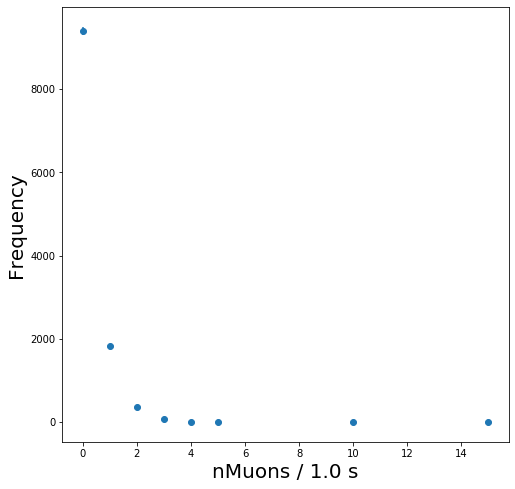

In [10]:
twoleg3 = pd.read_csv("./data/Merged/twolegOS3.txt" )

twoleg_muons, tu_tl = rate(twoleg3, TU = 1)